# Microsoft Movie Analysis

_Author: Valentina Valdez_

![picture of motion picture camera](Images/pexels-donald-tong-66134.jpg)

## 1.0 Business Understanding

### 1.1 Company Vision & High Level Goals

Microsoft's decision to venture into the movie industry marks an exciting strategic shift. By telling compelling stories through film, Microsoft can connect with audiences on an emotional level and establish a stronger presence in popular culture, leading to increased brand awareness. 

Other tech companies, such as Apple and Amazon, have succesfully transitioned into the entertainment industry. By leveraging its extensive technological expertise, vast resources, and global reach, Microsoft can produce high-quality movies that will enhance its brand image and increase its cultural influence.

This research seeks to use the available data to gain valuable insights into trends and consumption patterns, enabling the company to create tailored content that resonates with viewers and maximizes box office success. Within this analysis, I will explore what types of films Microsoft should make to maximize profitability and create positive brand exposure by producing critically acclaimed films. 


### 1.3 Research Goals

Given the above goals and industry background, this analysis will focus on the following topics:
- Limit analysis to films released between 2010 and 2019.
- Investigate the types of films that produce high ROIs. 
- Find directors with experience creating either high ROI, high prestige films, or both. 

Let's dive in!

## 2.0 Data Understanding

This analysis uses a variety of trusted data sources. The datasets will be used to narrow down how Microsoft should  invest in its filmaking efforts. The sources are as follows:

- **IMDB:** Launched in 1990 - and owned by Amazon since 1998 - IMDB is one of the most popular and recognizable databases. This database houses a large amount of information such as directors, writers, genres, and release date.  
- **The Numbers:** This database was started in 1997, and is now the largest freely available database of movie business information. The available data contains information about movie titles, production budgets, and gross revenue data. 
- **The Academy Awards**: This data was created by scraping the <a href="https://awardsdatabase.oscars.org/">academy database</a> for a Kaggle competition. The Academy Awards is considered the most prestigious filmaking award in America, and this data will provide valuable insights in identifying individuals capable of making prestige films. This dataset contains information on Academy Award nominees and winners between the years 1927 and 2023. Access the data <a href="https://www.kaggle.com/datasets/unanimad/the-oscar-award">here</a> .  


This analysis is limited by the information in these datasets, and may not fully encompass the full scope of the filmaking industry. However, the data is current enough that this analysis can still provide valuable insight and guide Microsoft on their next steps.


The first step in this analysis is to understand the data and how we can transform it to gleam insights. First, I am importing the necessary libraries to read the data and perform the necessary analysis. I will review the data sources one by one to determine what needs to be done before we can perform analysis. 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime
%matplotlib inline

# Change pandas formatting to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

### 2.1 IMDB

Let's examine IMDB's database first, which is the most extensive of the three. I will need information on movies titles, their genres, and the directors per film. 

In [2]:
#Connect to database
conn = sqlite3.connect("Data/im.db")

#Review tables
imdb_tables = pd.read_sql("""SELECT name FROM sqlite_master;""", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [3]:
#Query tables 
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [4]:
#Review structure of 'movie_basics' table
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
#Query 'movie_akas' table
movie_akas = pd.read_sql("""
SELECT * 
FROM movie_akas
WHERE region IS 'US'
AND (language IS 'en' OR language IS NULL)
;""", conn)

#Review structure of 'movie_akas' table
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51465 entries, 0 to 51464
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           51465 non-null  object 
 1   ordering           51465 non-null  int64  
 2   title              51465 non-null  object 
 3   region             51465 non-null  object 
 4   language           523 non-null    object 
 5   types              6689 non-null   object 
 6   attributes         2450 non-null   object 
 7   is_original_title  51460 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.1+ MB


### 2.2 The Numbers

For this dataset, the goal is to calculate the Return on Investment per film. Additionally, films will be categorized by budget so that the budget can be discribed as low, mid, or high. Eventually, I can tie this information to the IMDB table and identify which films and directors have produced high ROIs. 

In [6]:
#Import data
numbers_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')

#Preview table
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
#Review data structure
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### 2.3 The Academy Awards

This dataset will be critical in providing information on which films and directors have been critically accalimed. 

In [8]:
#Import Data
oscars_df = pd.read_csv('Data/the_oscar_award.csv')

#Preview Data
oscars_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [9]:
#Review data structure 
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.2+ KB


## 3.0 Data Preparation

Now that we have a good understanding of our data, the next step is to clean the datasets and engineer some features.

### 3.1 IMDB

#### 3.1.1 Movie Genres

For the IMDB dataset, I will need the film name, release year, director, and genre. I will also filter films made prior to 2010 and any foreign language films. 

In [10]:
#Query relevant tables and preview data

movies_data = pd.read_sql(
"""
SELECT primary_title AS movie, 
       start_year AS release_year, 
       genres,
       primary_name AS director,
       primary_title || start_year AS m_id,
       CASE
           WHEN death_year IS NULL THEN 1
           ELSE 0
        END AS current
  FROM movie_basics
      JOIN directors 
           USING(movie_id)
      JOIN persons
           USING(person_id)
  WHERE start_year BETWEEN 2010 AND 2019
    AND movie_id IN (SELECT movie_id
                     FROM movie_akas
                     WHERE region IS 'US'
                     AND (language = 'en' OR language IS NULL)
);""", conn)

#Preview results
movies_data.head()

,movie,release_year,genres,director,m_id,current
0,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
1,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
2,Bigfoot,2017,"Horror,Thriller",Mc Jones,Bigfoot2017,1
3,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,Cooper and Hemingway: The True Gen2013,1
4,Heaven & Hell,2018,Drama,Stuart Paul,Heaven & Hell2018,1


In [11]:
#Review DataFrame structure
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107173 entries, 0 to 107172
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   movie         107173 non-null  object
 1   release_year  107173 non-null  int64 
 2   genres        106423 non-null  object
 3   director      107173 non-null  object
 4   m_id          107173 non-null  object
 5   current       107173 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


In [12]:
#Check for duplicates
duplicates = movies_data[movies_data.duplicated()]
print(len(duplicates))
duplicates.head()

52917


,movie,release_year,genres,director,m_id,current
1,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
6,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0
7,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0
9,Foodfight!,2012,"Action,Animation,Comedy",Lawrence Kasanoff,Foodfight!2012,1
10,Foodfight!,2012,"Action,Animation,Comedy",Lawrence Kasanoff,Foodfight!2012,1


In [13]:
# Remove Duplicates
movies_data.drop_duplicates(inplace=True)

#Check number of records
print(f'Number of records: {len(movies_data)}')

#Review results
movies_data.head()

Number of records: 54256


,movie,release_year,genres,director,m_id,current
0,The Other Side of the Wind,2018,Drama,Orson Welles,The Other Side of the Wind2018,0
2,Bigfoot,2017,"Horror,Thriller",Mc Jones,Bigfoot2017,1
3,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,Cooper and Hemingway: The True Gen2013,1
4,Heaven & Hell,2018,Drama,Stuart Paul,Heaven & Hell2018,1
5,The Final Journey,2010,Drama,R.J. Adams,The Final Journey2010,0


In [14]:
#Check for extraneous values
for col in movies_data.columns:
    print(col, '\n', movies_data[col].value_counts(normalize=True).head(), '\n')

movie 
 World of Death               0.00
Venice 70: Future Reloaded   0.00
Our RoboCop Remake           0.00
Our Footloose Remake         0.00
Grindsploitation             0.00
Name: movie, dtype: float64 

release_year 
 2016   0.13
2014   0.12
2013   0.12
2015   0.12
2017   0.11
Name: release_year, dtype: float64 

genres 
 Documentary    0.17
Drama          0.11
Comedy         0.06
Horror         0.05
Comedy,Drama   0.03
Name: genres, dtype: float64 

director 
 Larry Rosen       0.00
Dustin Ferguson   0.00
Philip Gardiner   0.00
Charlie Minn      0.00
James Franco      0.00
Name: director, dtype: float64 

m_id 
 World of Death2016               0.00
Venice 70: Future Reloaded2013   0.00
Our RoboCop Remake2014           0.00
Our Footloose Remake2011         0.00
Grindsploitation2016             0.00
Name: m_id, dtype: float64 

current 
 1   1.00
0   0.00
Name: current, dtype: float64 



In [15]:
#Print results from data cleaning
print(f" This table has {len(movies_data)} entries. \
Each entry represents a film, its release date, genres, and director.")

 This table has 54256 entries. Each entry represents a film, its release date, genres, and director.


### 3.2 The Numbers

Next step is to clean and create features for the numbers dataset. From here, we want to find net profits and ROI. In addition to that, each film will be categorized by the size of their budget. 

In [16]:
#Check for duplicates
duplicates = numbers_df[numbers_df.duplicated()]
print(len(duplicates))

0


In [17]:
#Check for extraneous values
for col in numbers_df.columns:
    print(col, '\n', numbers_df[col].value_counts(normalize=True).head(), '\n\n')

id 
 4    0.01
53   0.01
61   0.01
65   0.01
69   0.01
Name: id, dtype: float64 


release_date 
 Dec 31, 2014   0.00
Dec 31, 2015   0.00
Dec 31, 2010   0.00
Dec 31, 2008   0.00
Dec 31, 2013   0.00
Name: release_date, dtype: float64 


movie 
 Halloween        0.00
Home             0.00
King Kong        0.00
The Karate Kid   0.00
Brothers         0.00
Name: movie, dtype: float64 


production_budget 
 $20,000,000   0.04
$10,000,000   0.04
$30,000,000   0.03
$15,000,000   0.03
$25,000,000   0.03
Name: production_budget, dtype: float64 


domestic_gross 
 $0            0.09
$8,000,000    0.00
$2,000,000    0.00
$7,000,000    0.00
$10,000,000   0.00
Name: domestic_gross, dtype: float64 


worldwide_gross 
 $0           0.06
$8,000,000   0.00
$7,000,000   0.00
$2,000,000   0.00
$9,000,000   0.00
Name: worldwide_gross, dtype: float64 




Unfortunately, this dataset contains some movies that do not have reported worldwide gross numbers. These will be dropped, but first, I will convert the columns to their appropiate data type. 

In [18]:
#Converting release_date column to datetime object
numbers_df['release_date'] = pd.to_datetime(numbers_df['release_date'])

#Filter results to movies released after 1969 - start of the New Hollywood Era 
numbers_df = numbers_df.loc[numbers_df['release_date'] >= '2010']


#Review results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"


In [19]:
#Convert 'production_budget', 'domestic_gross', 'worldwide_gross' to integers

#Remove extra symbols from strings
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols:
    numbers_df[col] = numbers_df[col].str.replace('$','').str.replace(',','')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220


In [20]:
#Convert columns to integers
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
numbers_df[cols] = numbers_df[cols].apply(pd.to_numeric, axis=1)

#Review results
numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2194 non-null   int64         
 1   release_date       2194 non-null   datetime64[ns]
 2   movie              2194 non-null   object        
 3   production_budget  2194 non-null   int64         
 4   domestic_gross     2194 non-null   int64         
 5   worldwide_gross    2194 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 120.0+ KB


In [21]:
#Drop rows where worldwide_gross is 0. 
numbers_df = numbers_df.loc[numbers_df['worldwide_gross'] > 0]

Now that the data is clean, we can create the 'ROI' (Return on Investment) column with the following formula:

$$
ROI = \frac{Net Gross}{Production Budget} * 100
$$

In [22]:
#Add Net Profit Column
numbers_df['net_profit'] = (numbers_df['worldwide_gross'] - numbers_df['production_budget']).round(-3)

#Add ROI Column
numbers_df['ROI'] = (numbers_df['net_profit'] / numbers_df['production_budget'] * 100).round(-1)

#Check results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311000,570.00


In [23]:
#Add new column "Year" as integer
numbers_df['release_year'] = pd.DatetimeIndex(numbers_df['release_date']).year

#Check results
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311000,570.00,2015


In [24]:
#Budget ranking - first, define function

def budget_ranking(budget):
    if budget < 500000:
        return "low"
    elif budget > 50000000:
        return "high"
    else:
        return "mid"

In [25]:
#Create new column and apply function

numbers_df['budget_level'] = numbers_df['production_budget'].apply(budget_ranking)
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,2011,high
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,2019,high
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,2015,high
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,2017,high
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311000,570.00,2015,high


In [26]:
#Isolate release year
numbers_df['release_year'] = numbers_df['release_date'].dt.year

#Create new column for identifying movies based on title and year
numbers_df['m_id'] = numbers_df['movie'] + numbers_df['release_year'].astype(str)

numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,release_year,budget_level,m_id
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635064000,150.00,2011,high,Pirates of the Caribbean: On Stranger Tides2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200238000,-60.00,2019,high,Dark Phoenix2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072414000,320.00,2015,high,Avengers: Age of Ultron2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999722000,320.00,2017,high,Star Wars Ep. VIII: The Last Jedi2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311000,570.00,2015,high,Star Wars Ep. VII: The Force Awakens2015


In [27]:
#Print results from data cleaning
print(f" This table has {len(numbers_df)} entries. \
Each entry represents a film and its financial data.")

 This table has 1922 entries. Each entry represents a film and its financial data.


### 3.3 The Academy Awards

In [28]:
#Filtering for films made between 1969 and 2019

oscars_df = oscars_df.loc[(oscars_df['year_film'] >= 2010) & (oscars_df['year_film'] <= 2019)].reset_index()
print("Min year: ", oscars_df['year_film'].min())
print("Max year: ", oscars_df['year_film'].max())


Min year:  2010
Max year:  2019


In [29]:
#Check for duplicates
duplicates = oscars_df[oscars_df.duplicated()]
print(len(duplicates))

0


In [30]:
#Check for extraneous values
for col in oscars_df.columns:
    print(col, '\n', oscars_df[col].value_counts(normalize=True).head(), '\n\n')

index 
 10239   0.00
9406    0.00
9399    0.00
9400    0.00
9401    0.00
Name: index, dtype: float64 


year_film 
 2019   0.10
2017   0.10
2016   0.10
2013   0.10
2012   0.10
Name: year_film, dtype: float64 


year_ceremony 
 2020   0.10
2018   0.10
2017   0.10
2014   0.10
2013   0.10
Name: year_ceremony, dtype: float64 


ceremony 
 92   0.10
90   0.10
89   0.10
86   0.10
85   0.10
Name: ceremony, dtype: float64 


category 
 BEST PICTURE                   0.07
DOCUMENTARY (Short Subject)    0.04
ACTOR IN A SUPPORTING ROLE     0.04
ACTRESS IN A SUPPORTING ROLE   0.04
WRITING (Adapted Screenplay)   0.04
Name: category, dtype: float64 


name 
 Alexandre Desplat   0.01
John Williams       0.01
Sandy Powell        0.00
Roger Deakins       0.00
Jacqueline Durran   0.00
Name: name, dtype: float64 


film 
 La La Land           0.01
The Shape of Water   0.01
Lincoln              0.01
The King's Speech    0.01
The Revenant         0.01
Name: film, dtype: float64 


winner 
 False   0.78
Tru

In [31]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          1253 non-null   int64 
 1   year_film      1253 non-null   int64 
 2   year_ceremony  1253 non-null   int64 
 3   ceremony       1253 non-null   int64 
 4   category       1253 non-null   object
 5   name           1253 non-null   object
 6   film           1214 non-null   object
 7   winner         1253 non-null   bool  
dtypes: bool(1), int64(4), object(3)
memory usage: 69.9+ KB


In [86]:
#Create new DataFrame showing how many nominartions each film received
oscars_by_film = oscars_df.groupby('film').agg( {'category': 'count','year_film': 'mean',})\
                         .reset_index()\
                        .rename(columns= {'category':'nominations'})
#Change 'year_film' type to integer
oscars_by_film['year_film'] = oscars_by_film['year_film'].astype(int)

#Create 'm_id' to merge with other tables
oscars_by_film['m_id'] = oscars_by_film['film'] + oscars_by_film['year_film'].astype(str)

#Review results
oscars_by_film.head()

,film,nominations,year_film,m_id
0,12 Years a Slave,9,2013,12 Years a Slave2013
1,127 Hours,6,2010,127 Hours2010
2,13 Hours: The Secret Soldiers of Benghazi,1,2016,13 Hours: The Secret Soldiers of Benghazi2016
3,13th,1,2016,13th2016
4,1917,10,2019,19172019


Some winners seem to be countries. This is an issue of who wins the award. For this analysis, we will only be looking at best actress, best actor, best director, and best picture awards. 

## 4.0 Exploratory Data Analysis

### 4.1 Does budget correlate to profits?

First, lets examine what correlation between ROI and worldwide gross profit.

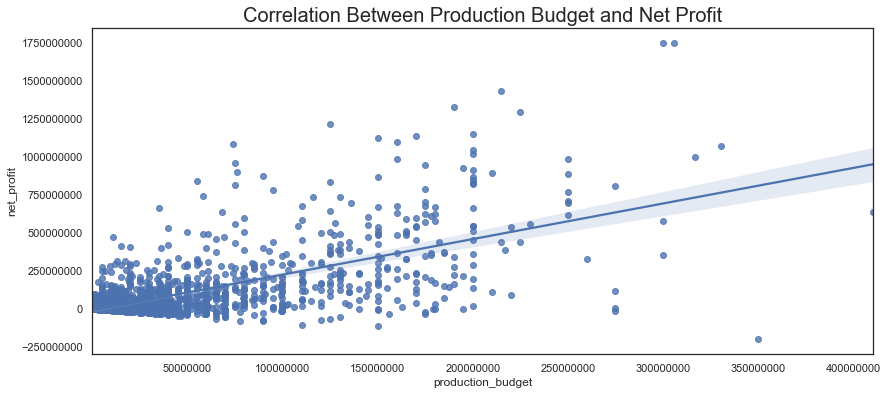

In [65]:
# Set the width and height
plt.figure(figsize=(14,6))

#Create plot
ax1 = sns.regplot(x=numbers_df['production_budget'],y=numbers_df['net_profit'])

#Create labels
ax1.ticklabel_format(style='plain')
plt.title('Correlation Between Production Budget and Net Profit', fontsize=20);

From the graph above, we can observe a modest positive correlation betweem budget and net profit. 

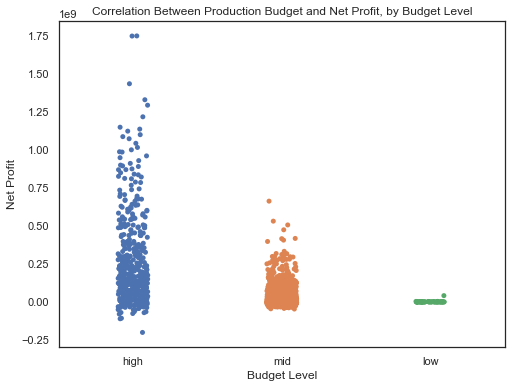

In [74]:
# Set the width and height
plt.figure(figsize=(8,6))

#Create plot
ax1 = sns.stripplot(x=numbers_df['budget_level'],y=numbers_df['net_profit'])

#Create labels
ax1.set_xlabel("Budget Level")
ax1.set_ylabel("Net Profit")
plt.title('Correlation Between Production Budget and Net Profit, by Budget Level');

''

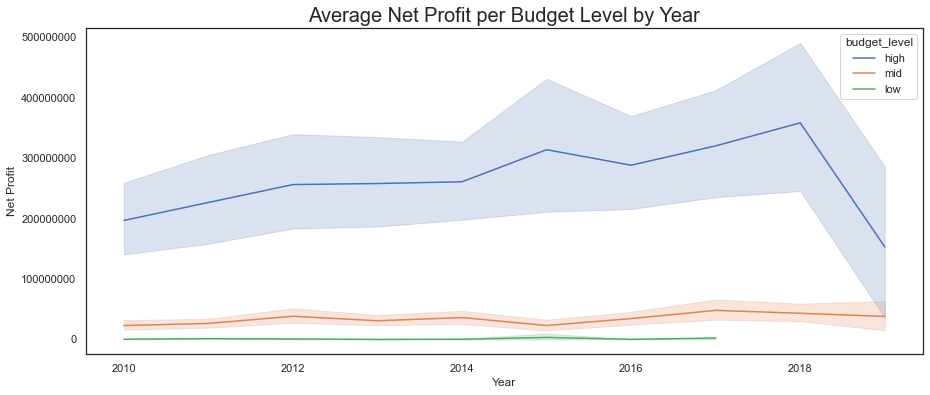

In [73]:
#Set figure size and style
sns.set(style="white")
plt.figure(figsize=(15, 6))

#Create plot
ax1 = sns.lineplot(data=numbers_df, x='release_year',y='net_profit', hue='budget_level', estimator='mean')

#Create labels
ax1.set_xlabel("Year")
ax1.set_ylabel("Net Profit")
ax1.ticklabel_format(style='plain')
plt.title('Average Net Profit per Budget Level by Year', fontsize=20)

;

While low budget movies can certainly be profitable, mid and high budgets have a better chance of earning much higher profits. 

## 4.2 Pick succesfull directors

We would like to properly staff these movies. Lets find current directors with good success records across different budget levels. 

In [35]:
#Make list of current directors by dropping those with directors with 'death_year' values
current_directors = movies_data[movies_data['current'] == 1]

#Add financial data to table
directors_budget = current_directors.merge(numbers_df, how='inner', \
                                           left_on=['m_id','movie','release_year'],\
                                          right_on=['m_id','movie','release_year'])

#Remove low budget films
directors_budget = directors_budget[~directors_budget['budget_level'].str.contains('low')]

#Sort
directors_budget.sort_values('net_profit', ascending=False).head()

,movie,release_year,genres,director,m_id,current,id,release_date,production_budget,domestic_gross,worldwide_gross,net_profit,ROI,budget_level
1180,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",Joe Russo,Avengers: Infinity War2018,1,7,2018-04-27,300000000,678815482,2048134200,1748134000,580.00,high
1179,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",Anthony Russo,Avengers: Infinity War2018,1,7,2018-04-27,300000000,678815482,2048134200,1748134000,580.00,high
3,Jurassic World,2015,"Action,Adventure,Sci-Fi",Colin Trevorrow,Jurassic World2015,1,34,2015-06-12,215000000,652270625,1648854864,1433855000,670.00,high
1000,Furious 7,2015,"Action,Crime,Thriller",James Wan,Furious 72015,1,67,2015-04-03,190000000,353007020,1518722794,1328723000,700.00,high
82,The Avengers,2012,"Action,Adventure,Sci-Fi",Joss Whedon,The Avengers2012,1,27,2012-05-04,225000000,623279547,1517935897,1292936000,570.00,high


In [116]:
#Rearrange data by directors
all_directors = directors_budget.groupby('director').agg(\
                                               {'production_budget': 'mean', \
                                                'net_profit': 'mean', \
                                                'ROI': 'mean',\
                                                'movie': 'count'})\
                                          .sort_values('net_profit', ascending=False).reset_index()
#Find top 30 directors
top_bdirectors = all_directors.head(30)

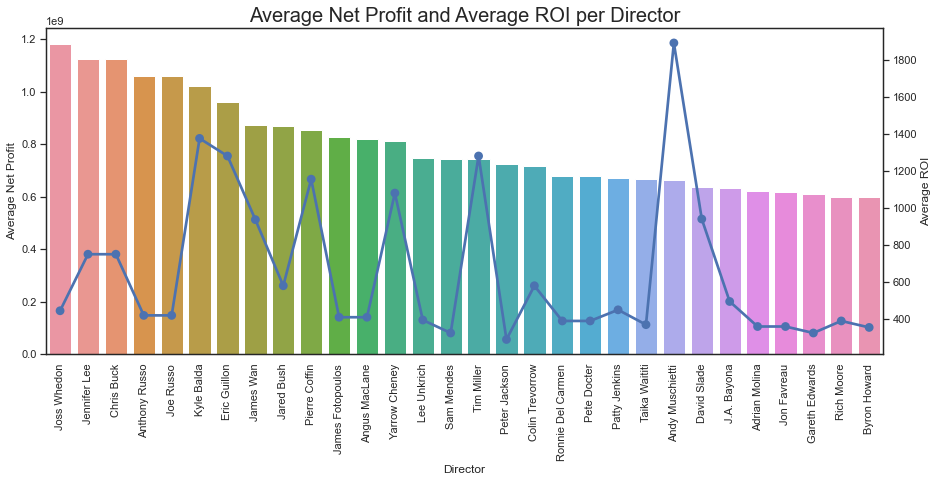

In [117]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_bdirectors['director'], y=top_bdirectors['net_profit'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_bdirectors['director'], y=top_bdirectors['ROI'], label='Average ROI', ax=ax2)

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Average Net Profit")
ax2.set_ylabel("Average ROI")
plt.title("Average Net Profit and Average ROI per Director", fontsize=20);


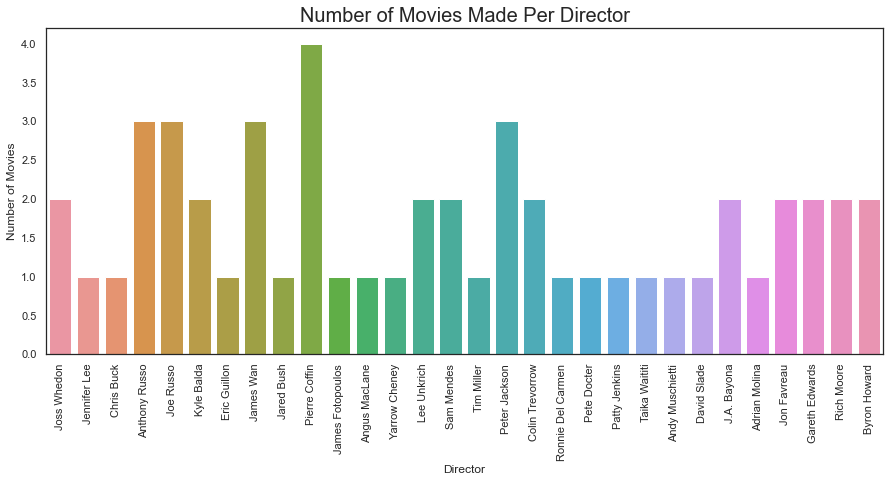

In [119]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot data
ax1 = sns.barplot(x=top_bdirectors['director'], y=top_bdirectors['movie'])

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Number of Movies")
plt.title("Number of Movies Made Per Director", fontsize=20);

## 4.3 Which of the top 100 directors can deliver award winning films?

In [99]:
#Merge tables
oscars_budgets = directors_budget.merge(oscars_by_film, how='left', on='m_id')

#Drop unnecessary rows
oscars_budgets.drop(['film', 'year_film', 'id', 'current', 'domestic_gross'], axis = 1, inplace=True)

#Fill Nan values in 'nominations' with 0
oscars_budgets['nominations'] = oscars_budgets['nominations'].fillna(0)

#Add new categorical column based on whether or not a film was nominated for any Academy Awards
oscars_budgets['nominated'] = oscars_budgets['nominations'] > 0

oscars_budgets.head()

,movie,release_year,genres,director,m_id,release_date,production_budget,worldwide_gross,net_profit,ROI,budget_level,nominations,nominated
0,Foodfight!,2012,"Action,Animation,Comedy",Lawrence Kasanoff,Foodfight!2012,2012-12-31,45000000,73706,-44926000,-100.00,mid,0.00,False
1,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",Ben Stiller,The Secret Life of Walter Mitty2013,2013-12-25,91000000,187861183,96861000,110.00,high,0.00,False
2,A Walk Among the Tombstones,2014,"Action,Crime,Drama",Scott Frank,A Walk Among the Tombstones2014,2014-09-19,28000000,62108587,34109000,120.00,mid,0.00,False
3,Jurassic World,2015,"Action,Adventure,Sci-Fi",Colin Trevorrow,Jurassic World2015,2015-06-12,215000000,1648854864,1433855000,670.00,high,0.00,False
4,The Rum Diary,2011,"Comedy,Drama",Bruce Robinson,The Rum Diary2011,2011-10-28,45000000,21544732,-23455000,-50.00,mid,0.00,False


In [114]:
directors_awards = oscars_budgets.groupby('director').agg(\
                                                    {'net_profit': 'mean', \
                                                     'ROI': 'mean',\
                                                     'movie': 'count',\
                                                     'nominated': 'count'})\
                                                      .sort_values('nominated', ascending=False).reset_index()
top_ndirectors = directors_awards.head(30)
top_ndirectors

,director,net_profit,ROI,movie,nominated
0,Tim Story,47742875.00,488.75,8,8
1,Steven Spielberg,182905714.29,218.57,7,7
2,Clint Eastwood,135479142.86,255.71,7,7
3,Jon M. Chu,150243000.00,363.33,6,6
4,Zack Snyder,294184000.00,126.00,5,5
5,Peter Farrelly,95995600.00,382.00,5,5
6,Tim Burton,229633400.00,170.00,5,5
7,Brad Peyton,185171600.00,198.00,5,5
8,Steven Soderbergh,61170600.00,698.00,5,5
9,David O. Russell,113364200.00,524.00,5,5


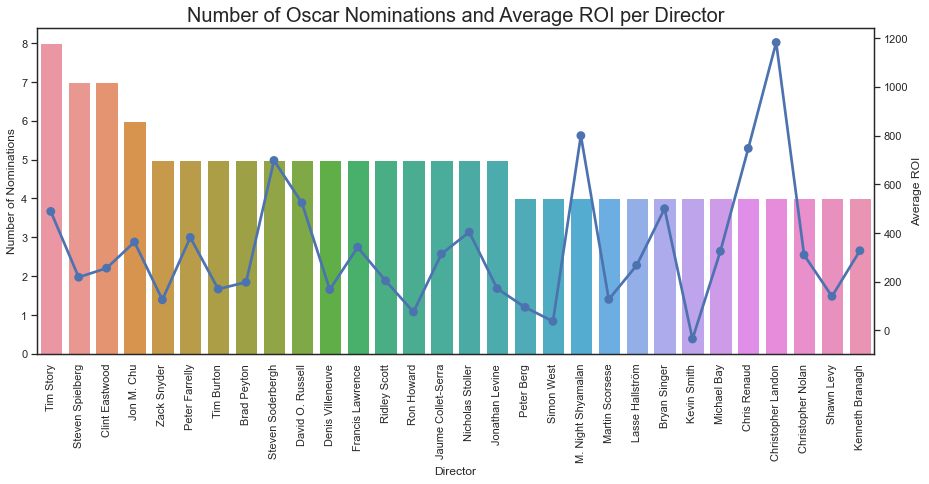

In [115]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_ndirectors['director'], y=top_ndirectors['nominated'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_ndirectors['director'], y=top_ndirectors['ROI'], label='Average ROI', ax=ax2)

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Number of Nominations")
ax2.set_ylabel("Average ROI")
plt.title("Number of Oscar Nominations and Average ROI per Director", fontsize=20);

### Unicorns

In [122]:
top_directors = directors_awards.head(100).merge(all_directors.head(100), how='inner')
top_directors

,director,net_profit,ROI,movie,nominated,production_budget
0,Zack Snyder,294184000.00,126.00,5,5,190000000.00
1,Francis Lawrence,404238400.00,342.00,5,5,104400000.00
2,Bryan Singer,438768500.00,500.00,4,4,157000000.00
3,Michael Bay,565999500.00,325.00,4,4,162000000.00
4,Chris Renaud,554696000.00,747.50,4,4,75000000.00
5,Christopher Nolan,584045000.00,310.00,4,4,187500000.00
6,Mike Mitchell,329124250.00,300.00,4,4,111000000.00
7,Pierre Coffin,854936500.00,1155.00,4,4,73500000.00
8,James Mangold,310556333.33,253.33,3,3,119666666.67
9,Shane Black,365492333.33,203.33,3,3,112666666.67


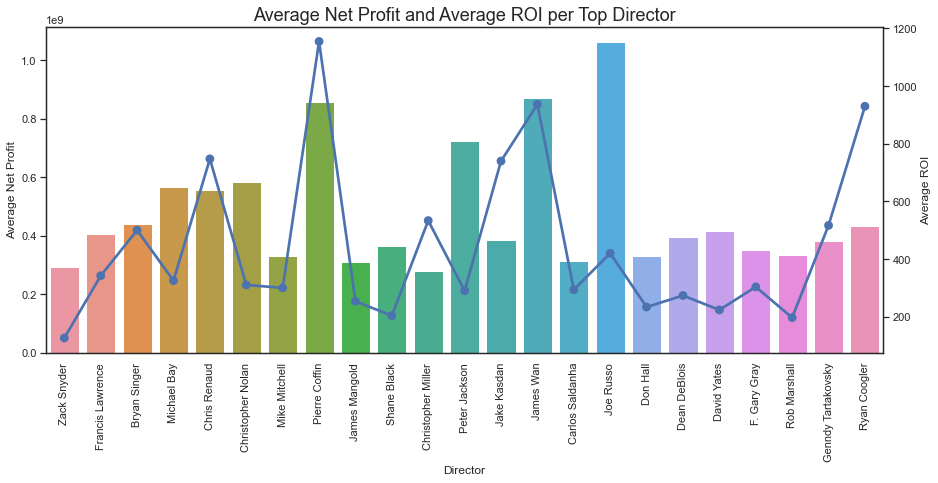

In [127]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_directors['director'], y=top_directors['net_profit'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_directors['director'], y=top_directors['ROI'], label='Average ROI', ax=ax2)

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Average Net Profit")
ax2.set_ylabel("Average ROI")
plt.title("Average Net Profit and Average ROI per Top Director", fontsize=18);

## Recommendations

After this preliminary review, we recommend that Microsoft invests in the following strategies:

- Invest in mostly high budget films*
- Select directors with experience delivering high net gross and high ROI films
- To create criticallty acclaimed films, select directors that have experience delivering both high ROI and positive net profit films



However, much research is still to be done. The biggest recommendation is to continue this research and explore the following: 